# 1.0 INTRODUCTION

This project presents an exploratory data analysis (EDA) of Superstore's sales, profits, and customer behavior. The analysis aims to identify key insights that can guide strategic decisions to improve business performance. By leveraging Python for data manipulation and visualization, this project uncovers trends and patterns in sales, shipping, and customer loyalty, providing actionable recommendations for stakeholders.


# 2.0 GOALS OF THE PROJECT

- To analyze sales trends across different regions and categories.
- To identify the most profitable products and customer segments.
- To understand shipping efficiency and areas for improvement.
- To evaluate customer loyalty based on order frequency and sales contributions.
- To provide actionable insights for strategic decision-making.

# 3.0 IMPORTING DATA AND NECESSARY LIBRARIES

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r"C:/Users/wah/Downloads/superstore data.xlsx")
df.head() #shows the first 5 rows of the data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [132]:
#Show the shape of the data
df.shape

(9978, 21)

The above result shows that the data has 9978 rows and 21 columns

# 4.0 DATA CLEANING

In [133]:
# Check for Null columns
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

The above results show no column has any null entry

In [134]:
# show duplicate rows
df[df.duplicated(keep="last")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


The above results show no row has duplicate entries

In [135]:
# ADD YEAR COLUMN
def get_year(x):
    return x.year
df["Year"]=df["Order Date"].apply(get_year)
    

In [136]:
df.columns # To confirm if year entry was added

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

In [137]:
df["Year"] # Confirms the results

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9973    2014
9974    2017
9975    2017
9976    2017
9977    2017
Name: Year, Length: 9978, dtype: int64

In [138]:
# SUMMARY OF THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9978 non-null   int64         
 1   Order ID       9978 non-null   object        
 2   Order Date     9978 non-null   datetime64[ns]
 3   Ship Date      9978 non-null   datetime64[ns]
 4   Ship Mode      9978 non-null   object        
 5   Customer ID    9978 non-null   object        
 6   Customer Name  9978 non-null   object        
 7   Segment        9978 non-null   object        
 8   Country        9978 non-null   object        
 9   City           9978 non-null   object        
 10  State          9978 non-null   object        
 11  Postal Code    9978 non-null   int64         
 12  Region         9978 non-null   object        
 13  Product ID     9978 non-null   object        
 14  Category       9978 non-null   object        
 15  Sub-Category   9978 n

# 5.0 SALES ANALYSIS

## 5.1 Regions by Volume of Sales Recorded

Region
South      389571.4710
Central    501239.8908
East       675967.2960
West       725278.7365
Name: Sales, dtype: float64


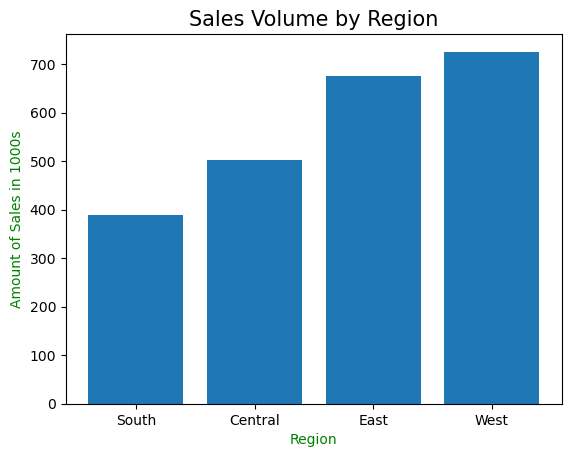

In [139]:
by_region=df.groupby("Region")["Sales"].sum().sort_values()
print(by_region)
plt.bar(by_region.index, by_region/1000)
plt.xlabel("Region", color='g')
plt.ylabel("Amount of Sales in 1000s", color='g')
plt.title("Sales Volume by Region", fontsize=15)
plt.show()

By knowing the regions with their respective sales record, the business will know where to put more effort in marketing initiatives.
The results, that are visualized above, show that, over a period of three years, West Region leads with sales of 725278.74, seconded by East Region with sales of 675967.30, followed by Central Region with Sales of 501239.89. South Region has lowest sales of 89571.47.
The higher population of West and East regions can be one of the main reasons why the business realized higher sales in these zones.  The organization is recommended to position itself strongly inWesti andEastl region because they are the hubs with many customers and huge sales. However, apart from population factors, the business can analyze why its sales are too low in entrall Region andSouthn Region.


## 5.2 Sales trend by region

Region      Central        East        South         West
Year                                                     
2014    103838.1646  128117.713  103845.8435  147883.0330
2015    102874.2220  156332.057   71134.8305  139966.2495
2016    147429.3760  180612.142   91684.9395  187480.1765
2017    147098.1282  210905.384  122905.8575  249949.2775


<Axes: title={'center': 'Sales Trend by Region'}, xlabel='Year', ylabel='Amount of Sales in Thousands'>

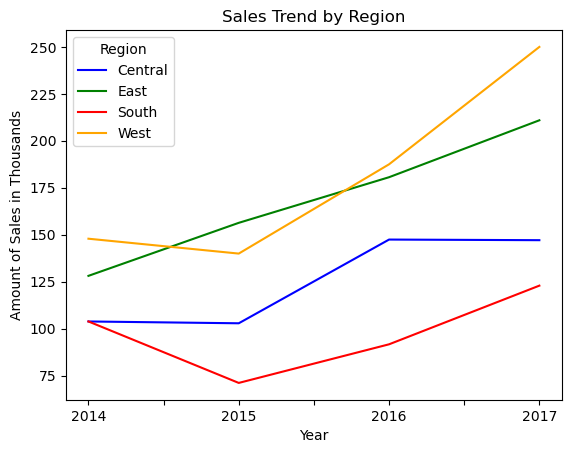

In [140]:
pivo=df.pivot_table(index = "Year", columns = "Region", values = "Sales", aggfunc="sum")
pivo.index=pivo.index.astype ("string")
print(pivo)
(pivo/1000).plot(ylabel="Amount of Sales in Thousands", color=['blue', 'green', 'red', 'orange'], title="Sales Trend by Region")

The sales data highlights a steady upward trend across all regions from 2014 to 2017, with notable variations in growth rates. The West region consistently outperformed others, reaching the highest sales of 249,949.28 in 2017. The East region also saw significant growth, particularly between 2015 and 2017, where sales increased by approximately 54,573.33. The Central and South regions showed moderate growth, with the Central region peaking in 2016 at 147,429.38 and the South region experiencing more consistent yet slower growth. Overall, the data suggests robust performance in the West and East, with opportunities for improvement in the South.
There is need for business to pay close attention to what is making sales in Central region to decline at a discouraging rate from 2016. 

## 5.3 Sales Trend by Category of Products

Category    Furniture  Office Supplies  Technology
Year                                              
2014      156630.1091       151776.412  175278.233
2015      170518.2370       137008.313  162780.809
2016      198042.2960       183500.862  225663.476
2017      215387.2692       243919.655  271551.723


<Axes: title={'center': 'Sales Trend by Category of Product'}, xlabel='Year', ylabel='Amount of Sales in Thousands'>

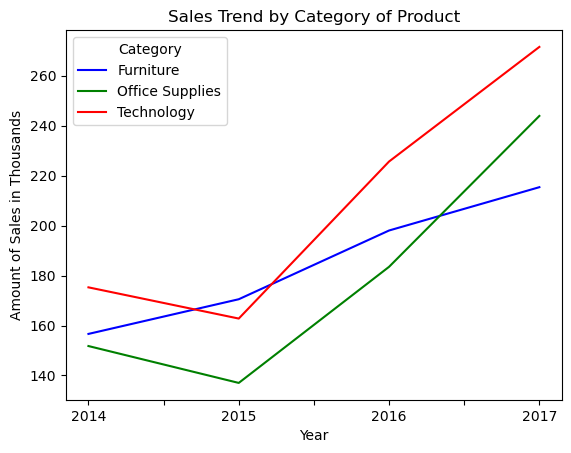

In [141]:
pivo2=df.pivot_table(index="Year", columns= "Category", values="Sales", aggfunc="sum")
pivo2.index=pivo2.index.astype("string")
print(pivo2)
(pivo2/1000).plot(ylabel="Amount of Sales in Thousands", title="Sales Trend by Category of Product", color=['blue', 'green', 'red'])

The sales data reveals strong growth across all categories from 2014 to 2017. Technology consistently led in sales, with a remarkable increase from 175,278.23 in 2014 to 271,551.72 in 2017, reflecting its dominant market position. Office Supplies showed steady growth, peaking at $243,919.66 in 2017, with the most significant jump occurring between 2016 and 2017. Furniture also experienced consistent growth, rising from 156,630.11 in 2014 to 215,387.27 in 2017. Overall, the data underscores the growing demand for technology, while Office Supplies and Furniture demonstrate promising but slightly slower upward trends.

## 5.4 Top 10 Cities with Biggest Sales

City
New York City    256294.4810
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64


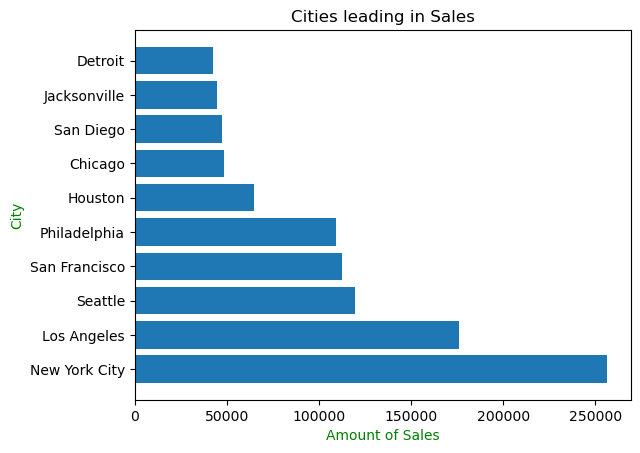

In [142]:
by_city=df.groupby("City")["Sales"].sum().sort_values(ascending=False)[:10]
print(by_city)
by_city.index=by_city.index.astype("string")
plt.barh(by_city.index, by_city)
plt.xlabel("Amount of Sales", color='g')
plt.ylabel('City',color='g')
plt.title("Cities leading in Sales")
plt.show()

From the above graph, it can be seen that the top ten leading cities in sales are New York City, Los Angeles, Seattle, San Francisco, Philadelphia, Houston, Chicago, San Diego, Jacksonville, and Detroit.

## 5.5 Comparison of the Quantity of the Categories Ordered with the Price

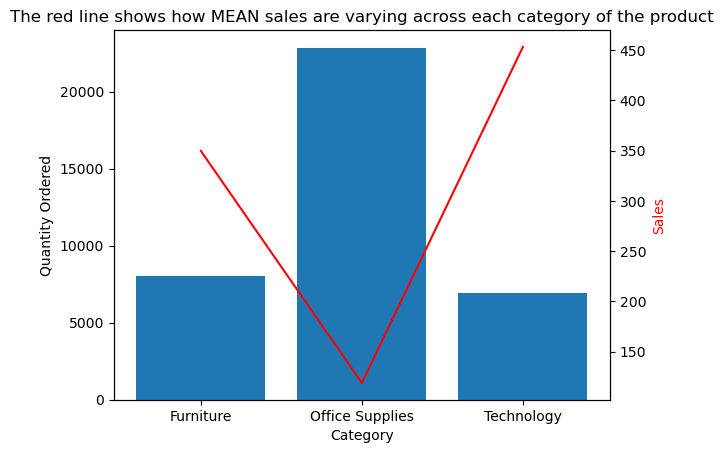

In [143]:
fig = plt.figure() 
ax1 = fig.add_subplot()
quantity_per_category=df.groupby("Category")["Quantity"].sum()
mean_sales=df.groupby("Category")["Sales"].mean()
ax2=ax1.twinx()
ax1.bar(quantity_per_category.index, quantity_per_category)
ax2.plot(quantity_per_category.index, mean_sales, color="r")
ax1.set_xlabel("Category")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel( "Sales", color="red")
plt.title("The red line shows how MEAN sales are varying across each category of the product")
plt.show()

From the above visualization, it can be observed that Office Supplies is the most demanded category of the product. The red line shows that its mean sales is lowest compared to that of Furniture and Technology categories. Therefore, Office Supplies is mainly ordered due to its low price while Furniture and Technology categories of products are rarely ordered due to their high prices. Quantity ordered in Technology is lowest because it is the highly priced category.
The organization can consider offering discounts on products that are categorized as Furniture or Technology as a way of drawing more customers. Also, the firm can consider adding more budget on advertisement of these commodities.


## 5.6 Top 5 Most Ordered Sub-Category Products

Sub-Category
Binders        5959
Paper          5156
Furnishings    3554
Phones         3289
Storage        3146
Art            3000
Accessories    2950
Chairs         2352
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64


<Axes: title={'center': 'Quantity Ordered by Sub Category'}, xlabel='Quantity', ylabel='Sub-Category'>

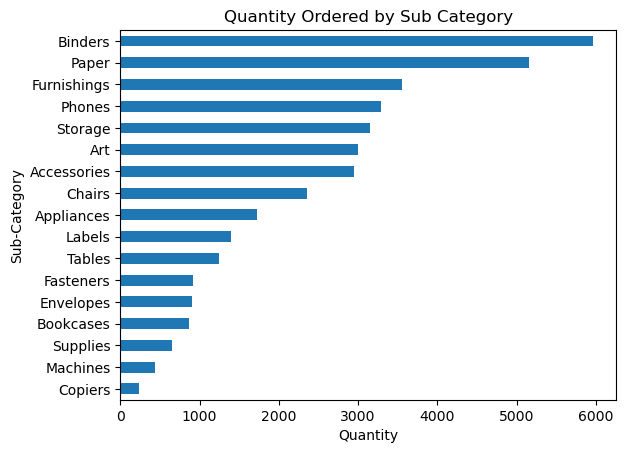

In [144]:
by_subc=df.groupby("Sub-Category")["Quantity"].sum()
print(by_subc.sort_values(ascending=False))
by_subc.sort_values().plot.barh(xlabel="Quantity", title="Quantity Ordered by Sub Category")

The data above highlights that Binders, Paper, and Furnishings are the top-selling sub-categories, contributing significantly to sales volume, suggesting strong customer demand. Conversely, Copiers, Machines, and Supplies are the least sold, indicating potential underperformance. To maximize growth, the firm should focus on promoting high-demand items like Binders and Paper through targeted marketing and bundling with related products. For low-performing categories, the company can consider revising pricing strategies, improving product visibility, or discontinuing underperforming products like Copiers if their profitability is consistently low. Additionally, investing in mid-tier categories like Phones and Chairs may offer growth opportunities, as they show moderate performance with potential for further expansion.

# 6.0 PROFIT ANALYSIS BY PRODUCT

## 6.1 Profit by Category of the Product

Category
Furniture          0.038623
Office Supplies    0.137655
Technology         0.156124
Name: Profit Margin, dtype: float64


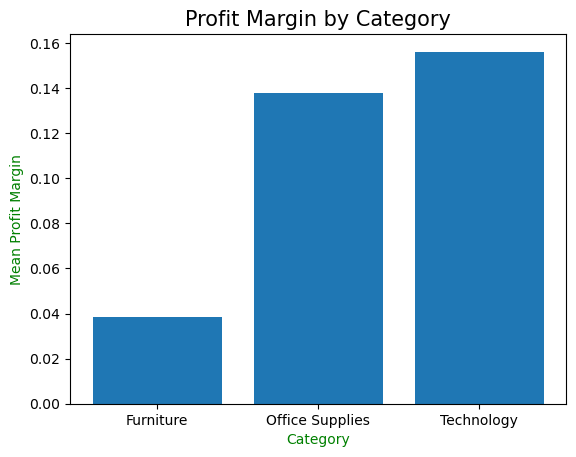

In [145]:
df['Profit Margin'] = df['Profit'] / df['Sales']
by_margin=df.groupby('Category')['Profit Margin'].mean()
print(by_margin)
fig=plt.figure()
plt.bar(by_margin.index, by_margin)
plt.ylabel("Mean Profit Margin", color="g")
plt.xlabel("Category",color="g")
plt.title("Profit Margin by Category", fontsize=15)
plt.show()

As illustrated by the above graph, Technology and Office Supplies have higher profitability, making them more lucrative areas to focus on. Conversely, Furniture category has shortest bar which translates to lower profitability, which may need optimization.

Overall, the visualization helps in strategic decision-making by highlighting areas where investments and efforts should be prioritized. Technology and Office Supplies categories can be expanded further, while Furniture category might require cost-cutting measures, price adjustments, or a reevaluation of their market strategies.

## 6.2 Profit Margin by Sub-Category

Sub-Category
Binders       -0.200462
Appliances    -0.156869
Tables        -0.147727
Bookcases     -0.126640
Machines      -0.072026
Chairs         0.044182
Storage        0.088637
Supplies       0.112039
Phones         0.119222
Furnishings    0.136746
Accessories    0.218499
Art            0.251646
Fasteners      0.299171
Copiers        0.317194
Envelopes      0.423140
Paper          0.425485
Labels         0.429663
Name: Profit Margin, dtype: float64


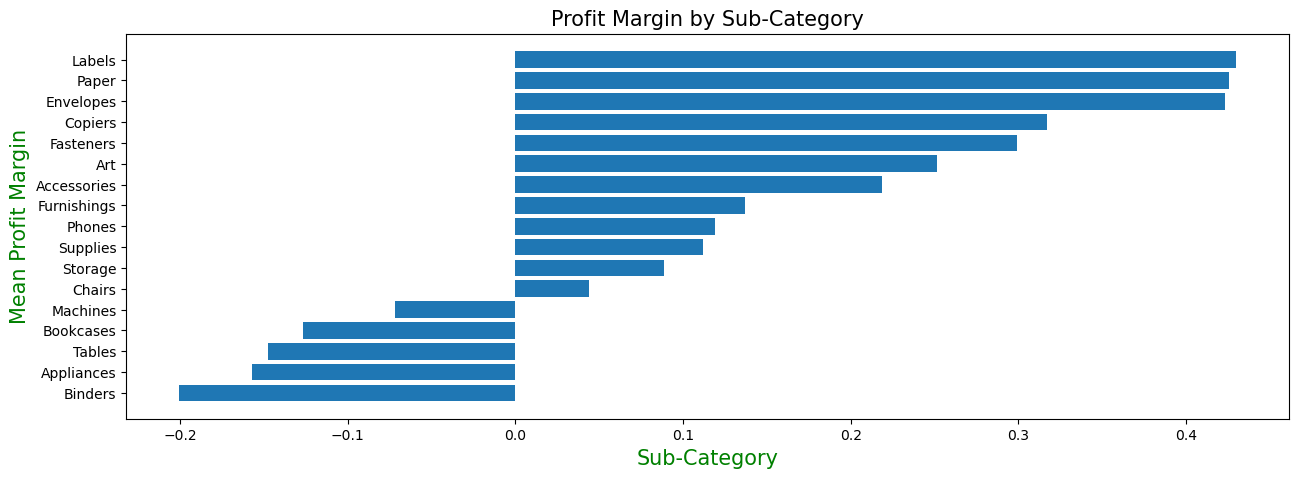

In [146]:
by_margin2=df.groupby('Sub-Category')['Profit Margin'].mean()
sorted_bymargin=by_margin2.sort_values()
print(sorted_bymargin)
fig=plt.figure(figsize=(15,5))
plt.barh(sorted_bymargin.index, sorted_bymargin)
plt.ylabel("Mean Profit Margin", color="g", fontsize=15)
plt.xlabel("Sub-Category",color="g", fontsize=15)
plt.title("Profit Margin by Sub-Category", fontsize=15)
plt.show()

The above graph and data reveals a wide range of profit margins across sub-categories, with some performing exceptionally well and others operating at a loss. Notably, Binders (-0.20), Appliances (-0.16), and Tables (-0.15) have negative profit margins, indicating they generate less revenue than their associated costs. Bookcases (-0.13) and Machines (-0.07) are also unprofitable, though their losses are less severe. These categories need immediate attention to identify the root causes of underperformance, such as high production costs, inefficient supply chains, or ineffective pricing strategies.

On the other hand, sub-categories like Labels (0.43), Paper (0.42), and Envelopes (0.42) demonstrate exceptional profitability. These products should be prioritized for expansion, marketing, and inventory optimization to capitalize on their high returns. Similarly, Copiers (0.32) and Fasteners (0.30) also contribute significantly to overall profitability and represent areas of strength in the product portfolio.

Mid-performing sub-categories, such as Phones (0.12), Furnishings (0.14), and Accessories (0.22), offer opportunities for growth. With targeted cost-reduction initiatives or slight price adjustments, their profit margins could be improved to match or exceed industry standards.

To improve overall profitability, it is recommended to focus on reducing losses in unprofitable sub-categories. For instance, reevaluate the pricing and operational efficiency of Binders and consider bundling them with profitable items like Paper. Expanding the product lines of high-margin categories, such as Labels and Envelopes, will amplify returns. Mid-tier categories like Phones and Furnishings should be optimized for better performance, either by reducing costs or increasing demand through targeted promotions.

Regular monitoring and reevaluation of profit margins are critical to sustaining profitability. Categories near breakeven, like Chairs (0.04) and Storage (0.09), should be closely observed to ensure they do not become unprofitable. Through these strategic interventions, the business can maximize its overall profitability and maintain long-term financial health.

# 7.0 ORDER ANALYSIS

## 7.1 Day of the Week Orders

Day of Week
Monday       7098
Friday       6859
Sunday       6432
Saturday     6349
Thursday     5379
Tuesday      4218
Wednesday    1450
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Quantity Ordered by Day from 2014 to 2017')

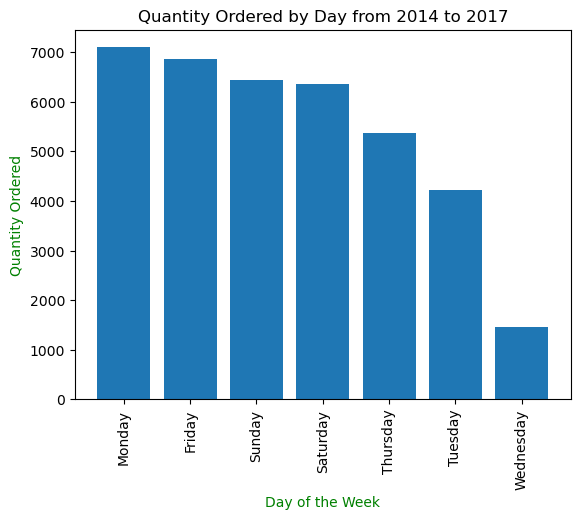

In [147]:
df['Day of Week'] = df['Order Date'].dt.day_name()
by_day=df.groupby("Day of Week")["Quantity"].sum().sort_values(ascending=False)
print(by_day)
fig=plt.figure()
plt.bar(by_day.index, by_day)
plt.ylabel("Quantity Ordered",color="g", fontsize=10)
plt.xlabel("Day of the Week", color="g", fontsize=10)
plt.xticks(rotation="vertical")
plt.title("Quantity Ordered by Day from 2014 to 2017") 

The above graph and data shows significant variations in the quantity of items ordered across different days of the week. Monday leads with the highest number of orders at 7,098, suggesting a strong demand as the week begins. Friday (6,859), Sunday (6,432), and Saturday (6,349) also experience high ordering activity, potentially influenced by end-of-week restocking or weekend shopping behaviors. On the other hand, Wednesday (1,450) and Tuesday (4,218) show the lowest quantities ordered, indicating relatively subdued customer activity midweek.

These trends suggest specific patterns in customer behavior, such as high engagement on certain weekdays, particularly the beginning and end of the week, while midweek shows a noticeable decline.

## 7.2 Seasonal Trends

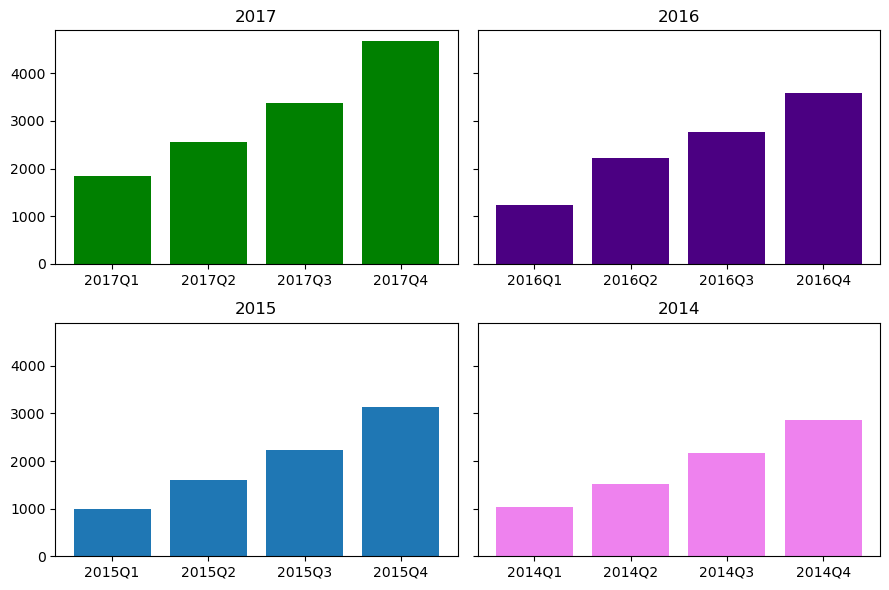

In [148]:
# Convert 'Order Date' column to quarterly periods and store in 'Quarter'
df['Quarter'] = df['Order Date'].dt.to_period('Q') 

# Convert 'Quarter' column to string for consistency in plotting and grouping
df['Quarter'] = df['Quarter'].astype("string")

# Filter data for each year
d_2017 = df[df["Year"] == 2017]  # Data for 2017
d_2016 = df[df["Year"] == 2016]  # Data for 2016
d_2015 = df[df["Year"] == 2015]  # Data for 2015
d_2014 = df[df["Year"] == 2014]  # Data for 2014

# Group data by quarter and sum the quantities ordered for each year
quarterly_2017 = d_2017.groupby('Quarter')['Quantity'].sum()  # Quarterly data for 2017
quarterly_2016 = d_2016.groupby('Quarter')['Quantity'].sum()  # Quarterly data for 2016
quarterly_2015 = d_2015.groupby('Quarter')['Quantity'].sum()  # Quarterly data for 2015
quarterly_2014 = d_2014.groupby('Quarter')['Quantity'].sum()  # Quarterly data for 2014

# Create a 2x2 subplot for visualizing quarterly order quantities for each year
fig, ax = plt.subplots(2, 2, figsize=(9, 6), sharex=False, sharey=True)

# Plot quarterly data for 2017 in the first subplot (top-left)
ax[0, 0].bar(quarterly_2017.index, quarterly_2017, color="green")
ax[0, 0].set_title("2017")  # Add a title for clarity

# Plot quarterly data for 2016 in the second subplot (top-right)
ax[0, 1].bar(quarterly_2016.index, quarterly_2016, color="indigo")
ax[0, 1].set_title("2016")  # Add a title for clarity

# Plot quarterly data for 2015 in the third subplot (bottom-left)
ax[1, 0].bar(quarterly_2015.index, quarterly_2015)
ax[1, 0].set_title("2015")  # Add a title for clarity

# Plot quarterly data for 2014 in the fourth subplot (bottom-right)
ax[1, 1].bar(quarterly_2014.index, quarterly_2014, color="violet")
ax[1, 1].set_title("2014")  # Add a title for clarity

# Show the plot
plt.tight_layout()  # Adjust spacing for better readability
plt.show()


The above data reveals a consistent upward trajectory in order quantities across all years, with significant growth in Q3 and Q4. This trend indicates that as demand increases, the latter half of the year—particularly Q3 and Q4—will continue to see higher order volumes. If this pattern persists, the business can expect further growth, especially in these quarters.

To effectively manage this growth, the business should invest in advanced stock management systems to align inventory with anticipated demand. Utilizing predictive analytics will help forecast demand for Q3 and Q4, allowing the business to better prepare for these peak periods. Additionally, implementing accurate forecasting tools will enable proactive stock replenishment, ensuring the business is well-equipped to handle surges in orders. By preparing for these high-demand quarters, the business can maximize sales opportunities, prevent stockouts, and enhance customer satisfaction throughout the year.

## 7.3 Shipping Mode Popularity

Ship Mode
Standard Class    5960
Second Class      1939
First Class       1536
Same Day           543
Name: count, dtype: int64

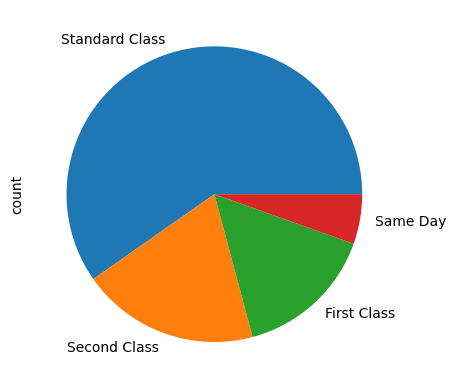

In [149]:
df['Ship Mode'].value_counts().plot(kind='pie')
df['Ship Mode'].value_counts()

The above data shows that Standard Class is the dominant shipping mode, accounting for the majority of orders (5,960). Second Class follows with 1,939 orders, while First Class and Same Day shipping make up smaller shares. Predictively, the business should focus on optimizing Standard Class logistics for cost-efficiency, while exploring ways to enhance the appeal of Second and First Class options to capture more premium customers and address urgent shipping needs.

## 7.4 Shipping Delays by Product

Sub-Category
Copiers          64
Machines        148
Bookcases       216
Fasteners       233
Supplies        266
Envelopes       315
Tables          334
Labels          471
Appliances      514
Chairs          694
Accessories     816
Art            1002
Storage        1011
Phones         1024
Furnishings    1075
Paper          1512
Binders        1858
Name: Shipping Time, dtype: int64


Text(0.5, 1.0, 'Examining Delays in Shipping of Products')

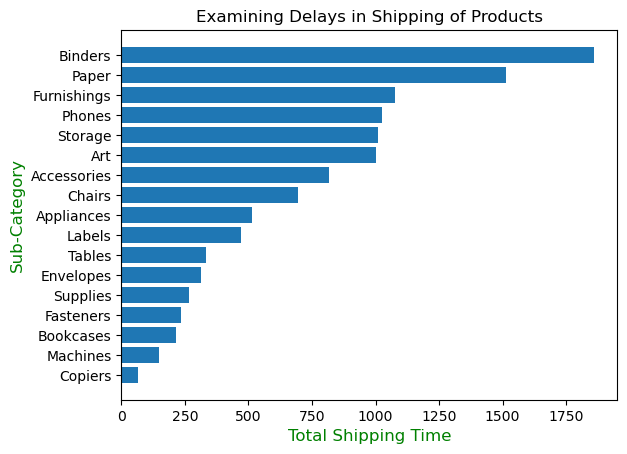

In [150]:
# Convert 'Ship Date' and 'Order Date' to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate shipping time by subtracting 'Order Date' from 'Ship Date'
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Identify rows with shipping delay. A delivery that takes more than 5 days is assumed to be delayed (> 5 days)
shipping_delay = df['Shipping Time'] > 5

# Filter delayed shipments
delayed_ = df[shipping_delay]

# Group by 'Sub-Category' and calculate total shipping time for delayed items
delayed_grouped = delayed_.groupby("Sub-Category")["Shipping Time"].sum().sort_values()

print(delayed_grouped)

# Create a horizontal bar chart for delayed shipments by sub-category
plt.barh(delayed_grouped.index, delayed_grouped)
plt.ylabel("Sub-Category", color="g", fontsize=12)
plt.xlabel("Total Shipping Time", color="green", fontsize=12)
plt.title("Examining Delays in Shipping of Products")


The above output reveals a range of shipping times across different product sub-categories, with significant delays in certain areas. Binders (1,858), Paper (1,512), and Furnishings (1,075) have the highest total shipping times, indicating that these products are experiencing the most delays. This suggests that these sub-categories may have inefficiencies or bottlenecks in their supply chain or fulfillment processes that need to be addressed. Investigating the root causes—such as inventory management, order processing, or shipping practices—could help reduce delays.

Moderate delays are observed in sub-categories like Chairs (694), Phones (1,024), and Storage (1,011). While the delays are not as severe as in the highest categories, these still represent areas that could benefit from process improvements. The business should explore optimizing shipping strategies for these products, perhaps by improving stock availability or refining logistics operations, to avoid further delays and improve overall customer satisfaction.

On the other hand, sub-categories such as Copiers (64) and Machines (148) show relatively low total shipping times, suggesting that these categories are performing well in terms of shipping efficiency. The business should continue monitoring these categories to maintain their performance and potentially apply successful practices to other product groups with higher delays.

## 7.5 Shipping Delays by Location

Region
South      1796
Central    2786
East       3127
West       3844
Name: Shipping Time, dtype: int64


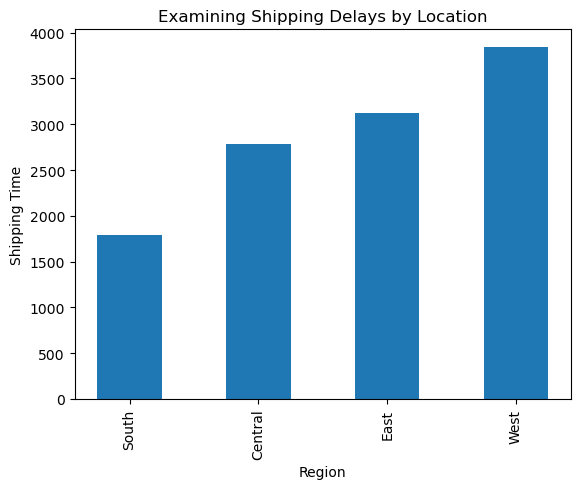

In [151]:
delayed_reg=delayed_.groupby("Region")["Shipping Time"].sum().sort_values()
plt.bar(delayed_reg.index, delayed_reg, width=0.5)
plt.ylabel("Shipping Time")
plt.xlabel("Region")
plt.xticks(rotation="vertical")
plt.title("Examining Shipping Delays by Location")
print(delayed_reg)

As shown in above analysis, the West region experiences the highest delayed shipping time (3,844 days), indicating major inefficiencies in logistics or supply chain management. Investigating factors such as infrastructure, distribution centers, or carrier performance will help reduce delays. Similarly, the East region also shows high delays (3,127 days) and needs attention to streamline operations.

The Central region has fewer delays (2,786 days), but there is still room for improvement. Efforts should focus on minimizing delays further. The South region shows the best performance with only 1,796 days of delays, but it’s crucial to monitor this region and maintain efficiency to avoid future issues.

# 8.0 CUSTOMER LOYALTY ANALYSIS

## 8.1 Top 3 Most Frequent Customers Per Year

Axes(0.125,0.11;0.775x0.77)
      Customer ID
2017  JL-15835       92
      SV-20365       73
      JM-15250       69
2016  JD-15895       90
      PP-18955       83
      EH-13765       74
2015  AG-10495       75
      PF-19120       68
      CB-12025       55
2014  SC-20020       56
      JD-15895       53
      RP-19390       50
Name: Quantity, dtype: int64


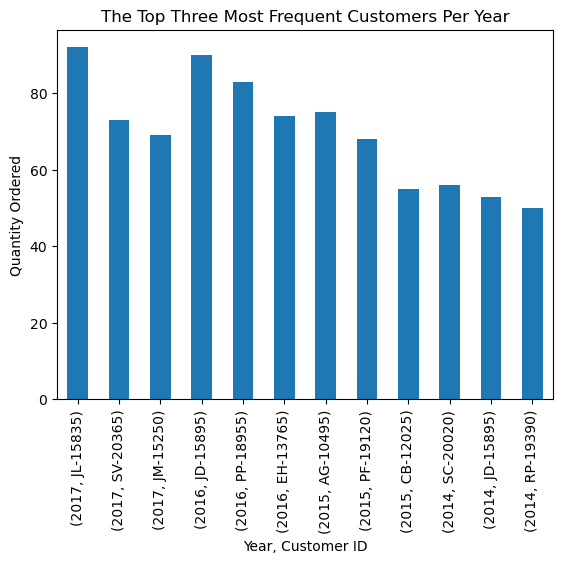

In [152]:
# Filter data for each year
gp_2017 = df[df["Year"] == 2017]  # Data for 2017
gp_2016 = df[df["Year"] == 2016]  # Data for 2016
gp_2015 = df[df["Year"] == 2015]  # Data for 2015
gp_2014 = df[df["Year"] == 2014]  # Data for 2014

# Group by 'Customer ID' and sum quantities ordered, then get top 3 customers for each year
top_2017 = gp_2017.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False)[:3]
top_2016 = gp_2016.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False)[:3]
top_2015 = gp_2015.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False)[:3]
top_2014 = gp_2014.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False)[:3]

# Combine top customers for all years into a single DataFrame with multi-level indexing
Best_customers = pd.concat([top_2017, top_2016, top_2015, top_2014], keys=["2017", "2016", "2015", "2014"])

# Plot the top 3 customers per year based on ordered quantity
print(Best_customers.plot.bar(ylabel="Quantity Ordered", xlabel="Year, Customer ID", 
                              title="The Top Three Most Frequent Customers Per Year"))

# Print the combined DataFrame of top customers for each year
print(Best_customers)


The above analysis highlights the most frequent customers across different years. In 2017, JL-15835, SV-20365, and JM-15250 were the top customers, placing 92, 73, and 69 orders respectively. These customers were key contributors to business growth that year.

In 2016, JD-15895, PP-18955, and EH-13765 led with 90, 83, and 74 orders. Their high order frequency indicates strong demand and loyalty. Similarly, in 2015, AG-10495, PF-19120, and CB-12025 ranked as the top customers with 75, 68, and 55 orders.

In 2014, SC-20020, JD-15895, and RP-19390 were the most frequent customers, with 56, 53, and 50 orders. Although the order volume was lower, these customers remained valuable. The analysis underscores the importance of these key customers in maintaining steady business performance.

## 8.2 Top Three Most Valuable Customers Per Year

Axes(0.125,0.11;0.775x0.77)
      Customer ID
2017  RB-19360       14.203278
      TA-21385       13.723498
      HL-15040       10.522550
2016  TC-20980       18.344052
      CC-12370       11.901184
      AB-10105       10.403865
2015  PF-19120        9.022324
      KD-16495        7.039044
      CM-12385        6.682260
2014  SM-20320       23.661228
      SC-20095       12.876480
      BM-11140       10.539896
Name: Sales, dtype: float64


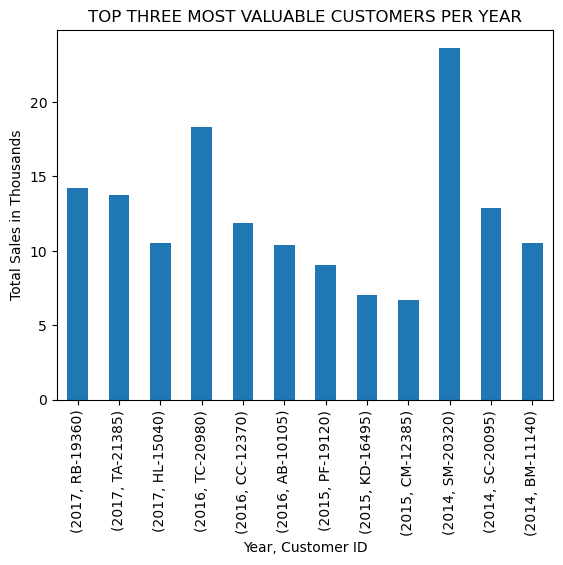

In [153]:

# Group by 'Customer ID' and sum total sales, then get top 3 customers for each year
best_2017 = gp_2017.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False)[:3]
best_2016 = gp_2016.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False)[:3]
best_2015 = gp_2015.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False)[:3]
best_2014 = gp_2014.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False)[:3]

# Combine top customers for all years into a single DataFrame with multi-level indexing
most_valuable = pd.concat([best_2017, best_2016, best_2015, best_2014], keys=["2017", "2016", "2015", "2014"])

# Convert sales figures from units to thousands for readability
most_valuable = most_valuable / 1000

# Plot the top 3 customers per year based on total sales in thousands
print(most_valuable.plot.bar(ylabel="Total Sales in Thousands", xlabel="Year, Customer ID", 
                             title="TOP THREE MOST VALUABLE CUSTOMERS PER YEAR"))

# Print the combined DataFrame of the most valuable customers for each year
print(most_valuable)


The analysis of the top three most valuable customers over the years provides valuable insights. In 2017, the top three customers were RB-19360, TA-21385, and HL-15040, with sales of 14.2k, 13.7k, and 10.5k units, respectively. These customers made significant contributions to revenue that year, showing a strong demand for their orders.

In 2016, TC-20980 was the highest value customer, contributing 18.3k in sales, followed by CC-12370 and AB-10105 with 11.9k and 10.4k, respectively. These customers were instrumental in driving sales, particularly TC-20980, whose orders stood out.

For 2015, the top customers were PF-19120, KD-16495, and CM-12385, with sales of 9.0k, 7.0k, and 6.7k, respectively. Although their sales were lower than in 2016 and 2017, they still remained crucial to the business during that period.

In 2014, SM-20320 was the highest-value customer with 23.7k in sales, followed by SC-20095 and BM-11140 with 12.9k and 10.5k. The large sales figure for SM-20320 shows it as a key account, significantly impacting the business’s performance that year.

These insights highlight the need to nurture relationships with these top customers, as their consistent high sales are critical for business growth.

# 9.0 CONCLUSION


The above exploratory data analysis of the Superstore dataset provides crucial insights to drive strategic decisions. Key findings include the West region leading in sales, closely followed by the East, while the South region shows lower performance but maintains efficient shipping times. Technology emerged as the most profitable category, followed by Office Supplies, while Furniture demonstrated lower profit margins, requiring optimization.

Shipping analysis highlighted significant delays in high-demand products such as Binders and Paper, especially in the West and East regions. These delays emphasize the need to streamline logistics, improve inventory management, and enhance supply chain efficiency. Standard Class shipping was identified as the most utilized mode, suggesting an opportunity to optimize its operations while enhancing premium shipping options to cater to customer preferences.

Customer loyalty analysis revealed a small group of high-value customers consistently contributing to revenue, underlining the importance of targeted engagement strategies. The business should focus on nurturing relationships with frequent buyers and top-performing clients through personalized marketing and incentives.

Overall, the Superstore dataset provides actionable recommendations to enhance sales, improve customer retention, and optimize operational efficiencies. Strategic investments in high-performing regions, profitable categories, and efficient logistics systems will ensure sustained growth and customer satisfaction.